# Explorando a Relação entre Fatores de Saúde e o Desenvolvimento de Diabetes

####Grupo
Cassio Valezzi - RM551059

Gustavo Kenzo - RM98481

Ian Cancian - RM98387

Henri de Olveira - RM98347

Vitor Shimizu - RM550390


# Análise do Banco de Dados de Diabetes

Este notebook realiza a análise dos dados do arquivo `Diabetes.csv`.
O objetivo é explorar as variáveis que influenciam a diabetes e realizar testes para prever essa enfermidade.
Serão aplicadas técnicas de limpeza, visualização e análise estatística para melhor entendimento das relações entre as variáveis.



## Carregamento dos Dados

Nesta etapa, carregamos o arquivo de dados `Diabetes.csv` e verificamos possíveis erros durante o carregamento.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

# Função para carregar o arquivo CSV e verificar erros
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print("Dados carregados com sucesso.")
        return data
    except FileNotFoundError:
        print("Erro: Arquivo não encontrado.")
    except pd.errors.EmptyDataError:
        print("Erro: Arquivo está vazio.")
    except Exception as e:
        print(f"Ocorreu um erro: {e}")


# Carregando os dados
file_path = 'Sprint3 Diabetes.csv'
data = load_data(file_path)

Dados carregados com sucesso.



## Visualização Inicial dos Dados

Vamos inspecionar as primeiras linhas do conjunto de dados para entender melhor a estrutura das variáveis.


In [3]:
# Exibir as primeiras linhas para inspecionar os dados
print("Primeiras linhas do conjunto de dados:")
print(data.head())

Primeiras linhas do conjunto de dados:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0   


## Análise, Limpeza e formatação dos dados


### Remover duplicatas

In [4]:
# Função para remover duplicatas
def remove_duplicates(data):
    try:
        duplicates = data.duplicated().sum()
        print(f"Número de duplicatas encontradas: {duplicates}")
        data_cleaned = data.drop_duplicates()
        print(f"Número de registros após remover duplicatas: {data_cleaned.shape[0]}")
        return data_cleaned
    except Exception as e:
        print(f"Ocorreu um erro ao remover duplicatas: {e}")


# Removendo duplicatas
if data is not None:
    data_cleaned = remove_duplicates(data)

Número de duplicatas encontradas: 23899
Número de registros após remover duplicatas: 229781


### Verificar valores nulos

In [7]:
# Função para verificar valores nulos
def check_nulls(data):
    try:
        null_values = data.isnull().sum()
        print("Valores nulos por coluna:\n", null_values)
    except Exception as e:
        print(f"Ocorreu um erro ao verificar valores nulos: {e}")

# Verificando valores nulos
if data_cleaned is not None:
    check_nulls(data_cleaned)

Valores nulos por coluna:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


### Tratamento de outliers

In [8]:
# Função para identificar e remover outliers com base no IQR
def remove_outliers_iqr(data, column):

    # Calculando os percentis 25% e 75%
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definindo os limites para identificar os outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Removendo os outliers
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    print(f"Número de outliers removidos: {len(data) - len(data_no_outliers)}")
    return data_no_outliers

# Aplicando a função para remover outliers da coluna 'BMI'
data_cleaned = remove_outliers_iqr(data, 'BMI')

# Exibindo a quantidade de registros antes e depois da remoção de outliers
print(f"Quantidade de registros antes: {len(data)}")
print(f"Quantidade de registros depois: {len(data_cleaned)}")

Número de outliers removidos: 9847
Quantidade de registros antes: 253680
Quantidade de registros depois: 243833



# Estatísticas Descritivas


In [9]:
# 1. Proporção de pessoas com pré-diabetes e diabetes no conjunto de dados
diabetes_mean = data_cleaned['Diabetes_012'].mean()
no_diabetes = len(data_cleaned[data_cleaned['Diabetes_012'] == 0])
pre_diabetes = len(data_cleaned[data_cleaned['Diabetes_012'] == 1])
diabetes = len(data_cleaned[data_cleaned['Diabetes_012'] == 2])
total = len(data_cleaned)

print("Proporção de pessoas sem diabetes: {:.2f}%".format((no_diabetes / total) * 100))
print("Proporção de pessoas com pré-diabetes: {:.2f}%".format((pre_diabetes / total) * 100))
print("Proporção de pessoas com diabetes: {:.2f}%".format((diabetes / total) * 100))

Proporção de pessoas sem diabetes: 85.10%
Proporção de pessoas com pré-diabetes: 1.78%
Proporção de pessoas com diabetes: 13.12%


In [10]:
# 2. Estado geral de saúde e influência da saúde mental
genhlth_mean = data_cleaned['GenHlth'].mean()
menthlth_mean = data_cleaned['MentHlth'].mean()

print("\nMédia da Saúde Geral (1 = Excelente, 5 = Ruim): {:.2f}".format(genhlth_mean))
print("Média dos dias com problemas de saúde mental nos últimos 30 dias: {:.2f}".format(menthlth_mean))


Média da Saúde Geral (1 = Excelente, 5 = Ruim): 2.48
Média dos dias com problemas de saúde mental nos últimos 30 dias: 3.07


In [11]:
# 3. Relação entre atividade física e problemas de mobilidade
phys_activity_mean = data_cleaned['PhysActivity'].mean()
diff_walk_mean = data_cleaned['DiffWalk'].mean()

print("\nProporção de pessoas que praticaram atividade física nos últimos 30 dias: {:.2f}%".format(phys_activity_mean * 100))
print("Proporção de pessoas com dificuldade para caminhar: {:.2f}%".format(diff_walk_mean * 100))


Proporção de pessoas que praticaram atividade física nos últimos 30 dias: 76.46%
Proporção de pessoas com dificuldade para caminhar: 15.69%


# Gráficos


###Pergunta 1: distribuição do Índice de Massa Corporal (BMI) entre diferentes grupos de diabetes

- **BMI entre 20 e 30** é o mais comum entre todos os grupos, especialmente para aqueles **sem diabetes**.
- **Pessoas com diabetes** tendem a ter **BMI mais alto**, sugerindo uma relação entre excesso de peso e desenvolvimento de diabetes.
- Embora o BMI elevado esteja associado ao diabetes, há uma sobreposição entre os grupos, indicando que o BMI sozinho não é suficiente para determinar a condição, mas é um fator de risco relevante.

**Conclusão**: Controlar o peso pode ajudar a reduzir o risco de desenvolver diabetes.Este gráfico mostra a **distribuição do Índice de Massa Corporal (BMI)** para grupos de indivíduos **sem diabetes**, **com pré-diabetes** e **com diabetes**:

- **BMI entre 20 e 30** é o mais comum entre todos os grupos, especialmente para aqueles **sem diabetes**.
- **Pessoas com diabetes** tendem a ter **BMI mais alto**, sugerindo uma relação entre excesso de peso e desenvolvimento de diabetes.
- Embora o BMI elevado esteja associado ao diabetes, há uma sobreposição entre os grupos, indicando que o BMI sozinho não é suficiente para determinar a condição, mas é um fator de risco relevante.

**Conclusão**: Controlar o peso pode ajudar a reduzir o risco de desenvolver diabetes.


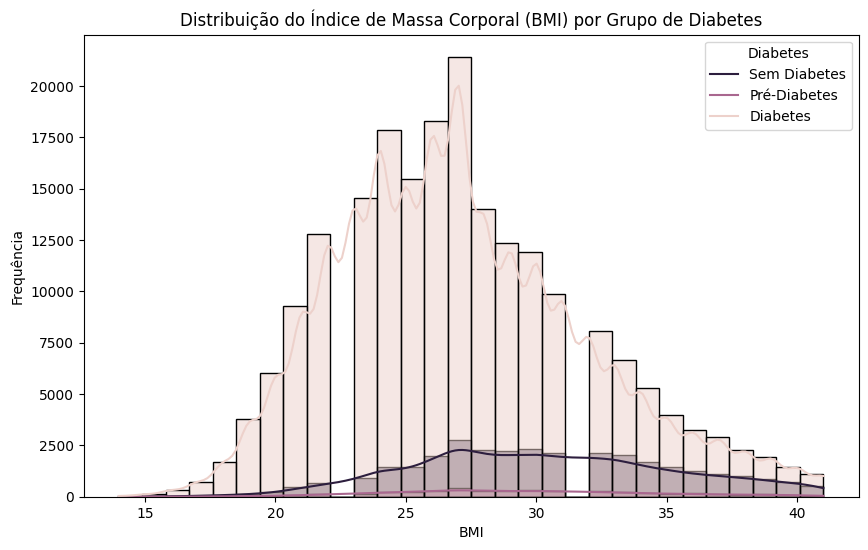

In [ ]:
# 1. Pergunta: Qual é a distribuição do Índice de Massa Corporal (BMI) entre diferentes grupos de diabetes?
plt.figure(figsize=(10, 6))
sns.histplot(data=data_cleaned, x='BMI', hue='Diabetes_012', kde=True, bins=30)
plt.title('Distribuição do Índice de Massa Corporal (BMI) por Grupo de Diabetes')
plt.xlabel('BMI')
plt.ylabel('Frequência')
plt.legend(title='Diabetes', labels=['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'])
plt.show()

###Pergunta 2: Qual é a relação entre o consumo de frutas e o nível de diabetes?

- **Observações**:
  - A maioria das pessoas que **não têm diabetes** consome frutas regularmente (valor 1.0), conforme o alto número no grupo "Sem Diabetes".
  - **Indivíduos com diabetes** são mais frequentes no grupo que **não consome frutas** (valor 0.0), indicando uma possível relação entre a falta de consumo de frutas e a prevalência de diabetes.

- **Conclusão**:
  - **Consumo de frutas** pode estar associado a um menor risco de diabetes, uma vez que a maioria dos indivíduos sem diabetes relatou consumir frutas.
  - **Promover o consumo regular de frutas** pode ser uma medida preventiva importante para reduzir o risco de diabetes e melhorar a saúde geral.

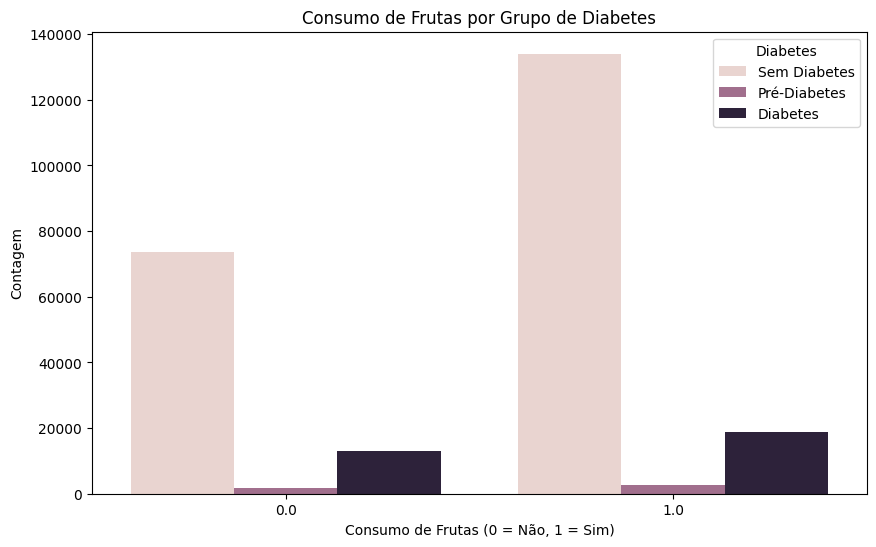

In [13]:
# 2. Qual é a relação entre o consumo de frutas e o nível de diabetes?
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Fruits', hue='Diabetes_012')
plt.title('Consumo de Frutas por Grupo de Diabetes')
plt.xlabel('Consumo de Frutas (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.legend(title='Diabetes', labels=['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'])
plt.show()

###Pergunta 3: Qual é a relação entre atividade física e saúde geral (GenHlth)?

- **Observações**:
  - A variável `PhysActivity` tem valores `0` (não pratica atividade física) e `1` (pratica atividade física).
  - A **mediana da saúde geral** para aqueles que **não praticam atividade física** está em torno de `3.5`, o que significa uma saúde considerada entre "regular" e "ruim".
  - Aqueles que **praticam atividade física** relatam uma saúde geral melhor, com a mediana próxima de `2.5`, que corresponde a um estado de saúde "muito bom".

- **Conclusão**:
  - **Praticar atividade física** está associado a uma **melhor percepção de saúde**. Isso sugere que a atividade física desempenha um papel importante na melhoria do estado de saúde, reforçando a importância de incentivar exercícios físicos para a população.

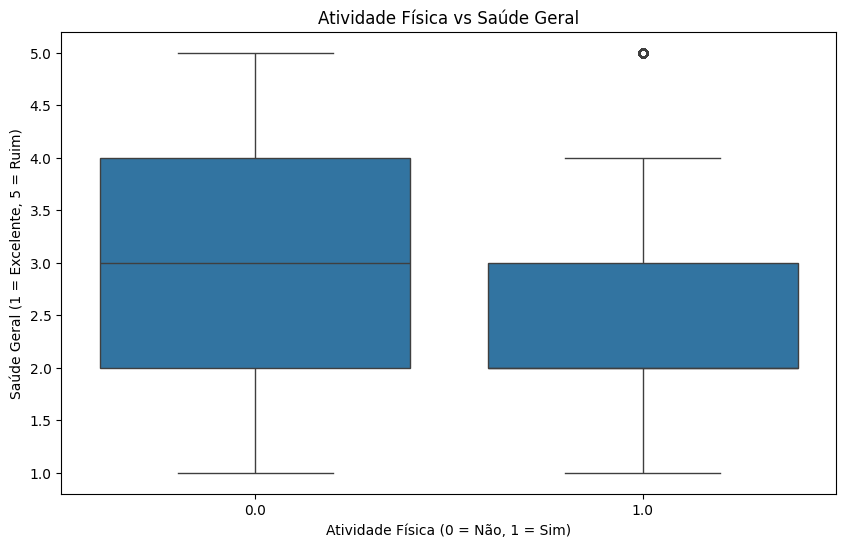

In [ ]:
# 3. Pergunta: Qual é a relação entre atividade física e saúde geral (GenHlth)?
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='PhysActivity', y='GenHlth')
plt.title('Atividade Física vs Saúde Geral')
plt.xlabel('Atividade Física (0 = Não, 1 = Sim)')
plt.ylabel('Saúde Geral (1 = Excelente, 5 = Ruim)')
plt.show()

###Pergunta 4: Existe uma correlação significativa entre pressão alta (HighBP) e colesterol alto (HighChol)?

Este gráfico de **heatmap** mostra a **correlação** entre as variáveis **Pressão Alta (HighBP)** e **Colesterol Alto (HighChol)**.

- **Observações**:
  - O coeficiente de correlação entre **HighBP** e **HighChol** é de **0.3**.
  - Isso indica uma **correlação positiva moderada** entre pressão alta e colesterol alto. Ou seja, pessoas com pressão alta têm uma tendência um pouco maior a também terem colesterol alto.

- **Conclusão**:
  - Embora a correlação não seja muito forte, ainda há uma relação que sugere que **pessoas com pressão alta** têm uma probabilidade maior de apresentarem níveis elevados de colesterol.
  - **Recomenda-se atenção especial** a esses fatores de risco em conjunto, já que ambos estão associados a um risco aumentado de problemas cardiovasculares.

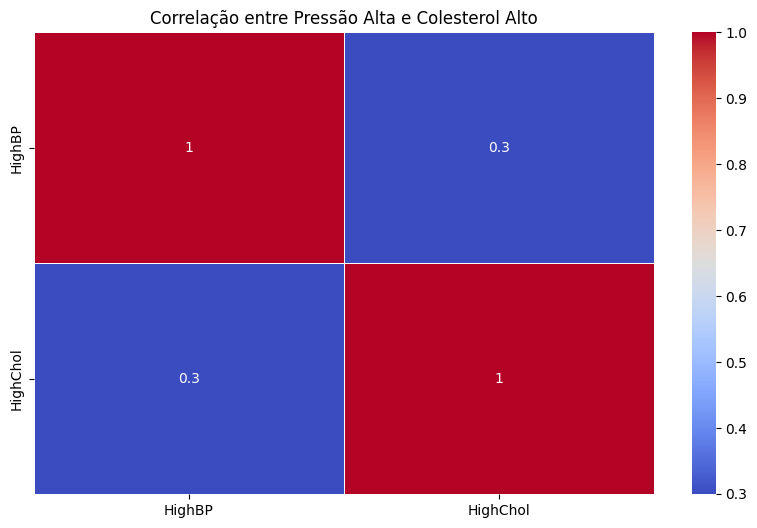

In [ ]:
# 4. Pergunta: Existe uma correlação significativa entre pressão alta (HighBP) e colesterol alto (HighChol)?
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned[['HighBP', 'HighChol']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlação entre Pressão Alta e Colesterol Alto')
plt.show()


# Análise de Correlação


1. Cálculo da Matriz de Correlação:
 * `data_cleaned.corr()` calcula a matriz de correlação para o DataFrame limpo, retornando os coeficientes de correlação entre todas as variáveis numéricas.

2. Visualização com Mapa de Calor:
 * `sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")` cria um mapa de calor para visualizar as relações entre as variáveis.

 * O argumento `annot=True` exibe os valores numéricos no mapa, `cmap='coolwarm'` fornece uma escala de cores para diferenciar correlações positivas e negativas, e `linewidths` ajusta a largura das linhas que separam os quadrantes.

3. Identificação das Correlações Significativas:
 * Define-se um limite (`threshold = 0.5`) para considerar uma correlação como significativa.

 * Filtra-se a matriz de correlação para identificar as variáveis que têm coeficientes de correlação com valor absoluto maior que o limite.

 * Exibe uma tabela que mostra as variáveis que têm correlações significativas, juntamente com os respectivos coeficientes de correlação.

Matriz de Correlação das Variáveis:
                      Diabetes_012    HighBP  HighChol  CholCheck       BMI  \
Diabetes_012              1.000000  0.261976  0.203327   0.075701  0.212027   
HighBP                    0.261976  1.000000  0.284186   0.111220  0.194126   
HighChol                  0.203327  0.284186  1.000000   0.094753  0.089615   
CholCheck                 0.075701  0.111220  0.094753   1.000000  0.042420   
BMI                       0.212027  0.194126  0.089615   0.042420  1.000000   
Smoker                    0.046774  0.074237  0.074627  -0.003776 -0.009196   
Stroke                    0.100276  0.124426  0.089258   0.027894  0.011062   
HeartDiseaseorAttack      0.170816  0.201271  0.176279   0.049995  0.039926   
PhysActivity             -0.103408 -0.104131 -0.063266  -0.004409 -0.127864   
Fruits                   -0.025462 -0.019329 -0.026125   0.017973 -0.067528   
Veggies                  -0.043446 -0.042853 -0.027254  -0.000537 -0.044185   
HvyAlcoholConsum

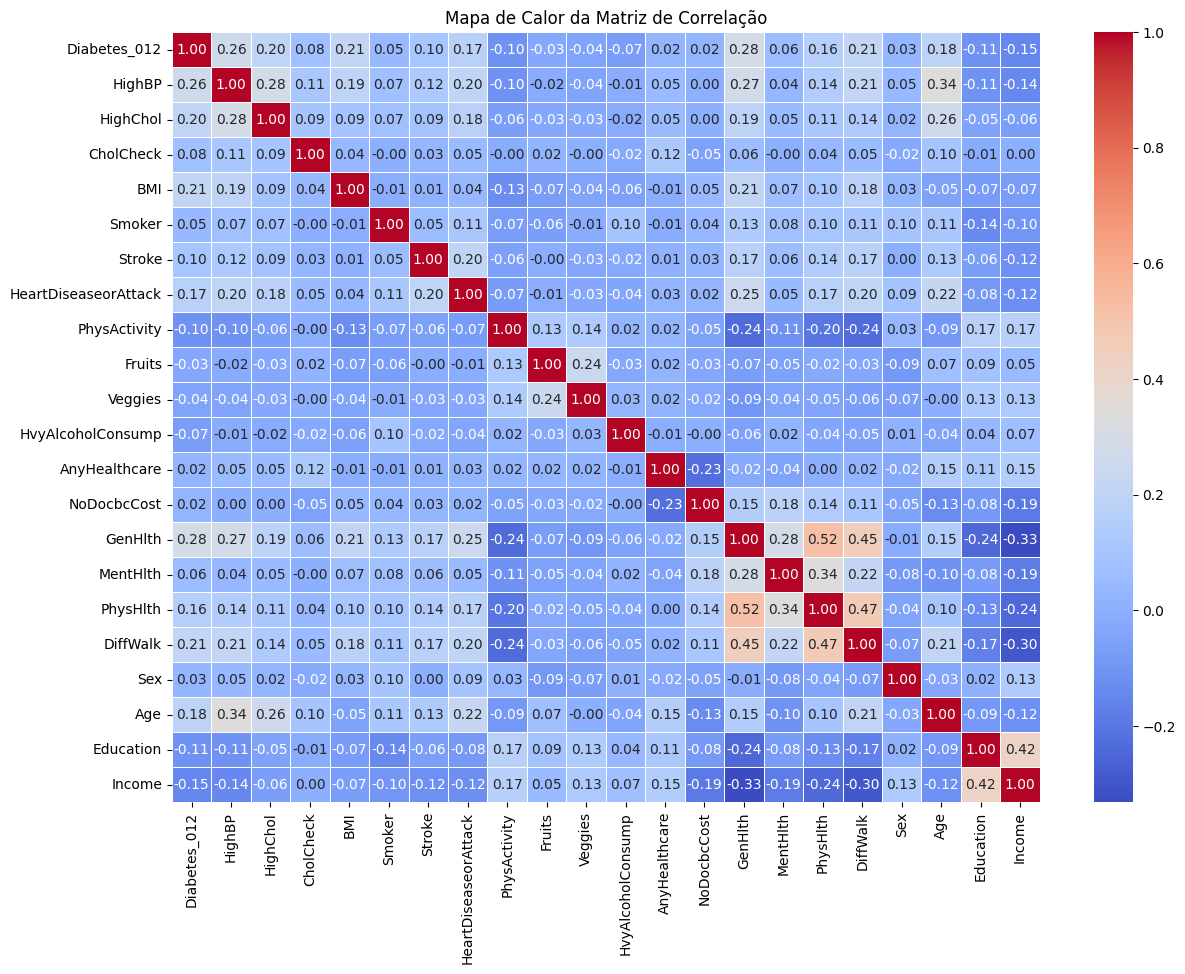


Correlações Significativas (|correlação| > 0.5):
  Variável 1 Variável 2  Coeficiente de Correlação
0    GenHlth   PhysHlth                   0.516508
1   PhysHlth    GenHlth                   0.516508


In [ ]:
# Removendo duplicatas
data_cleaned = data.drop_duplicates()

# Calculando a matriz de correlação
correlation_matrix = data_cleaned.corr()

# Exibindo a matriz de correlação
print("Matriz de Correlação das Variáveis:")
print(correlation_matrix)

# Visualizando a matriz de correlação com um mapa de calor (heatmap)
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

# Identificando e destacando as correlações significativas
# Definindo um limite para considerar uma correlação como significativa (valores > 0.5 ou < -0.5)
threshold = 0.5

# Extraindo as correlações que são maiores que o limite em valor absoluto e que não são a correlação de uma variável consigo mesma
significant_correlations = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix.abs() != 1.0)].stack().reset_index()
significant_correlations.columns = ['Variável 1', 'Variável 2', 'Coeficiente de Correlação']

# Exibindo as correlações significativas
print("\nCorrelações Significativas (|correlação| > 0.5):")
print(significant_correlations)



# Testes de Hipóteses




### 1. ANOVA para Comparar BMI em Diferentes Grupos de Diabetes

* H0: A média do BMI é igual entre os grupos (sem diabetes, pré-diabetes e diabetes)
* H1: Pelo menos um grupo tem uma média de BMI diferente

In [ ]:
groups = [data_cleaned[data_cleaned['Diabetes_012'] == group]['BMI'] for group in range(3)]
anova_result = stats.f_oneway(*groups)

print("Teste 1: Resultado do Teste ANOVA para BMI entre diferentes grupos de Diabetes:")
print(f"Estatística F: {anova_result.statistic:.2f}, p-valor: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Conclusão: Rejeitamos a hipótese nula. A média do BMI é diferente entre os grupos.\n")
else:
    print("Conclusão: Não rejeitamos a hipótese nula. A média do BMI é igual entre os grupos.\n")


Teste 1: Resultado do Teste ANOVA para BMI entre diferentes grupos de Diabetes:
Estatística F: 6333.41, p-valor: 0.0000
Conclusão: Rejeitamos a hipótese nula. A média do BMI é diferente entre os grupos.



### 2. Qui-quadrado para verificar se há relação entre Atividade Física e Saúde Geral

*   H0: Não há relação entre prática de atividade física e saúde geral
*   H1: Existe uma relação entre prática de atividade física e saúde geral

 Convertendo a variável de saúde geral para categórica (1-3 = boa saúde, 4-5 = má saúde)

In [ ]:
data_cleaned['GenHlth_Cat'] = data_cleaned['GenHlth'].apply(lambda x: 'Boa' if x <= 3 else 'Má')
contingency_table = pd.crosstab(data_cleaned['PhysActivity'], data_cleaned['GenHlth_Cat'])
chi2_result = stats.chi2_contingency(contingency_table)

print("Teste 2: Resultado do Teste Qui-quadrado para verificar relação entre Atividade Física e Saúde Geral:")
print(f"Estatística Chi²: {chi2_result[0]:.2f}, p-valor: {chi2_result[1]:.4f}")

if chi2_result[1] < 0.05:
    print("Conclusão: Rejeitamos a hipótese nula. Existe uma relação entre atividade física e saúde geral.\n")
else:
    print("Conclusão: Não rejeitamos a hipótese nula. Não há evidências de relação entre atividade física e saúde geral.\n")

Teste 2: Resultado do Teste Qui-quadrado para verificar relação entre Atividade Física e Saúde Geral:
Estatística Chi²: 12008.44, p-valor: 0.0000
Conclusão: Rejeitamos a hipótese nula. Existe uma relação entre atividade física e saúde geral.



<ipython-input-35-9543f6363169>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['GenHlth_Cat'] = data_cleaned['GenHlth'].apply(lambda x: 'Boa' if x <= 3 else 'Má')


### 3. Teste t de Student para Comparar Saúde Mental entre Pessoas com e sem Hipertensão
* H0: A média dos dias com problemas de saúde mental é igual entre pessoas com e sem hipertensão
* H1: A média dos dias com problemas de saúde mental é diferente entre pessoas com e sem hipertensão

In [ ]:
group_with_bp = data_cleaned[data_cleaned['HighBP'] == 1]['MentHlth']
group_without_bp = data_cleaned[data_cleaned['HighBP'] == 0]['MentHlth']
t_result = stats.ttest_ind(group_with_bp, group_without_bp, equal_var=False)  # equal_var=False para variâncias desiguais

print("Teste 3: Resultado do Teste t de Student para Comparar Saúde Mental entre Pessoas com e sem Hipertensão:")
print(f"Estatística t: {t_result.statistic:.2f}, p-valor: {t_result.pvalue:.4f}")

if t_result.pvalue < 0.05:
    print("Conclusão: Rejeitamos a hipótese nula. Existe uma diferença significativa na saúde mental entre pessoas com e sem hipertensão.\n")
else:
    print("Conclusão: Não rejeitamos a hipótese nula. Não há diferença significativa na saúde mental entre pessoas com e sem hipertensão.\n")

Teste 3: Resultado do Teste t de Student para Comparar Saúde Mental entre Pessoas com e sem Hipertensão:
Estatística t: 24.62, p-valor: 0.0000
Conclusão: Rejeitamos a hipótese nula. Existe uma diferença significativa na saúde mental entre pessoas com e sem hipertensão.

